In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# 读取数据

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train_df.shape

(381109, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [12]:
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
# 根据标签 Response 进行统计

train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot: xlabel='Response', ylabel='count'>

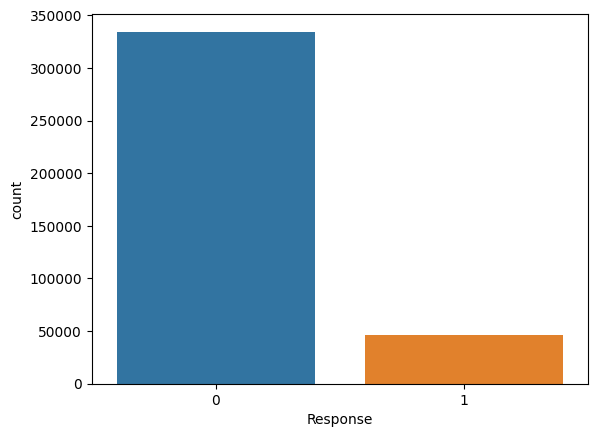

In [20]:
sns.countplot(x=train_df.Response)

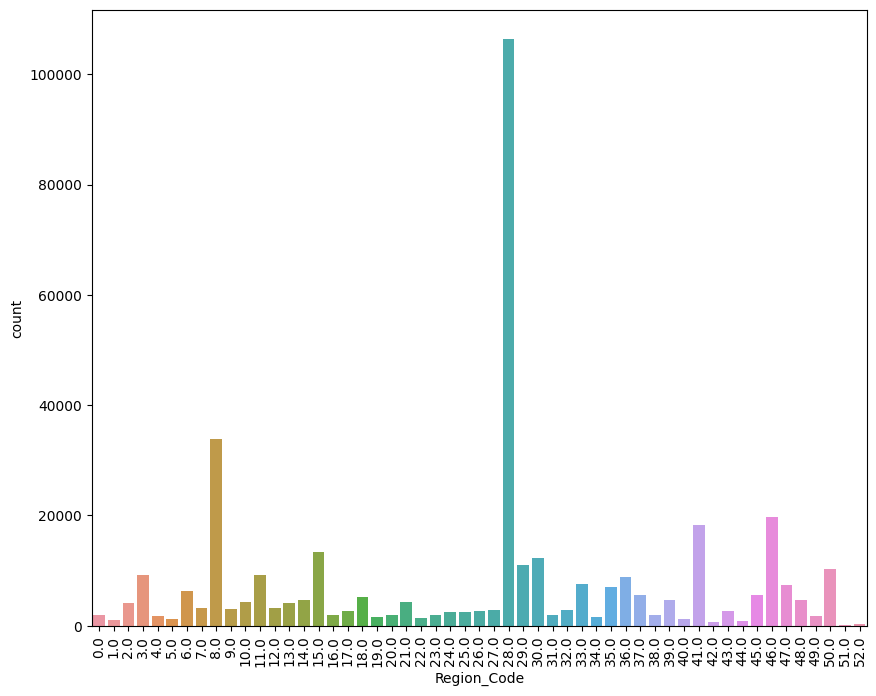

In [46]:
# Region_Code
plt.figure(figsize=(10,8))
sns.countplot(x=train_df.Region_Code)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

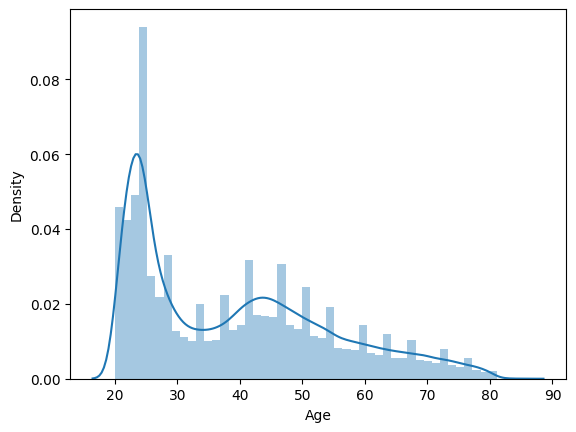

In [21]:
# 根据 Age 统计

sns.distplot(train_df.Age)

<AxesSubplot: xlabel='Gender', ylabel='count'>

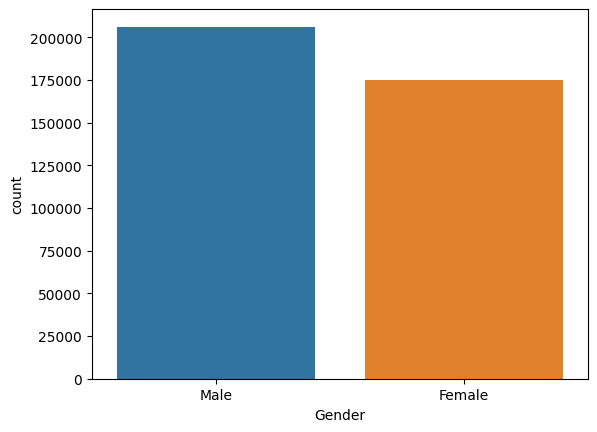

In [23]:
# Gender 统计
sns.countplot(x=train_df.Gender)

In [30]:
# Gender VS Response

df = train_df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()\

df

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


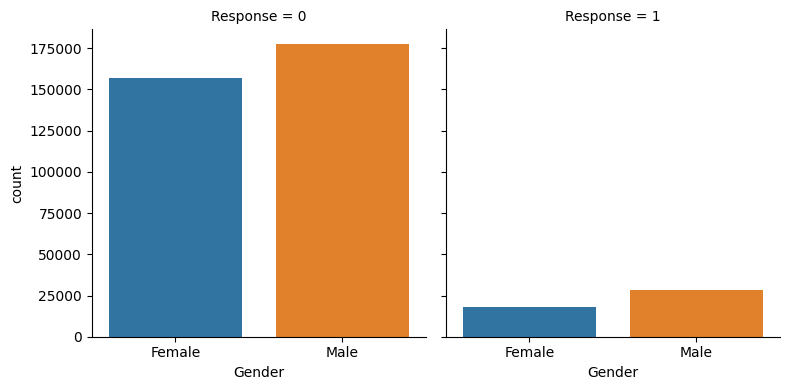

In [32]:
sns.catplot(x='Gender',y='count',col='Response',data=df,kind='bar', height=4)

In [35]:
# Vehicle_Age  VS Response

df = train_df.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


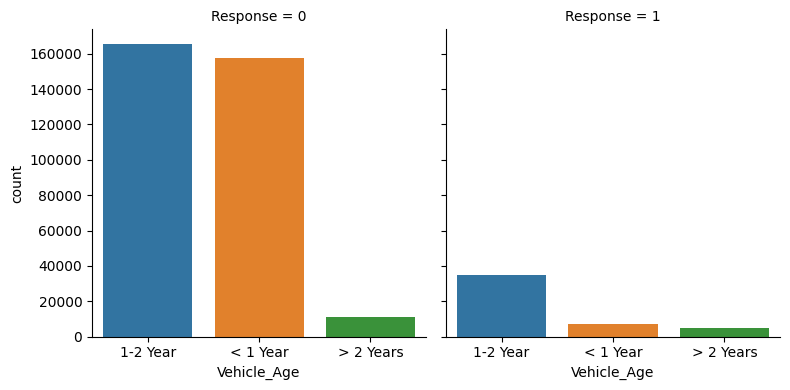

In [36]:
sns.catplot(x='Vehicle_Age', y='count', col='Response', data=df, kind='bar', height=4)

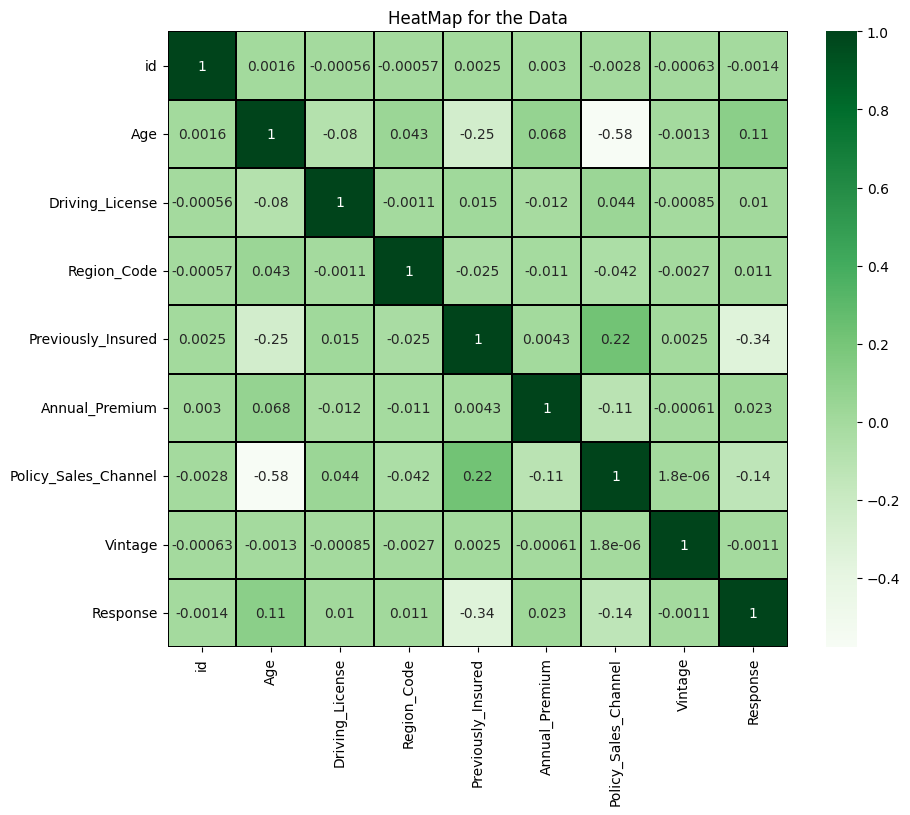

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), cmap='Greens', linecolor='black', linewidths=0.1, annot=True)
plt.title("HeatMap for the Data")
plt.show()

### Data Preprocessing

In [39]:
new_train_df = pd.get_dummies(train_df)

In [40]:
new_train_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [41]:
new_train_df.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_lt_1_Year',
                             'Vehicle_Age_> 2 Years':'Vehicle_Age_gt_2_Years'}, inplace=True)

In [42]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   Age                     381109 non-null  int64  
 2   Driving_License         381109 non-null  int64  
 3   Region_Code             381109 non-null  float64
 4   Previously_Insured      381109 non-null  int64  
 5   Annual_Premium          381109 non-null  float64
 6   Policy_Sales_Channel    381109 non-null  float64
 7   Vintage                 381109 non-null  int64  
 8   Response                381109 non-null  int64  
 9   Gender_Female           381109 non-null  uint8  
 10  Gender_Male             381109 non-null  uint8  
 11  Vehicle_Age_1-2 Year    381109 non-null  uint8  
 12  Vehicle_Age_lt_1_Year   381109 non-null  uint8  
 13  Vehicle_Age_gt_2_Years  381109 non-null  uint8  
 14  Vehicle_Damage_No   

In [48]:
num_features = ['Age', 'Vintage', 'Annual_Premium']

cat_features = ['Driving_License', 'Previously_Insured', 'Region_Code', 'Vehicle_Age_1-2 Year',
                'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years', 'Gender_Female','Gender_Male',
                'Vehicle_Damage_No','Vehicle_Damage_Yes','Policy_Sales_Channel']

In [49]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
new_train_df[num_features] = st.fit_transform(new_train_df[num_features])

In [50]:
new_train_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.574539,26.0,0.748795,1,0,1,0,0,1,0,1
1,2,2.396751,1,3.0,0,0.172636,26.0,0.342443,0,0,1,1,0,0,1,0
2,3,0.527181,1,28.0,0,0.449053,26.0,-1.521998,1,0,1,0,0,1,0,1
3,4,-1.148985,1,11.0,1,-0.113018,152.0,0.581474,0,0,1,0,1,0,1,0
4,5,-0.633242,1,41.0,1,-0.178259,152.0,-1.378580,0,1,0,0,1,0,1,0


In [51]:
# 删除 id

new_train_df.drop('id', axis=1, inplace=True)

In [52]:
new_train_df.dtypes

Age                       float64
Driving_License             int64
Region_Code               float64
Previously_Insured          int64
Annual_Premium            float64
Policy_Sales_Channel      float64
Vintage                   float64
Response                    int64
Gender_Female               uint8
Gender_Male                 uint8
Vehicle_Age_1-2 Year        uint8
Vehicle_Age_lt_1_Year       uint8
Vehicle_Age_gt_2_Years      uint8
Vehicle_Damage_No           uint8
Vehicle_Damage_Yes          uint8
dtype: object

In [56]:
X = new_train_df.drop(columns=['Response'], axis=1)
y = new_train_df['Response']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.2)

In [61]:
X_train.shape

(304887, 14)

In [62]:
y_train.shape

(304887,)

### 模型训练

In [78]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,make_scorer,precision_score
from sklearn.metrics import precision_recall_curve,auc,roc_curve,recall_score,classification_report

import xgboost as xgb
import lightgbm as lgb

In [63]:
# RandomForestClassifier

params = {
    'criterion': ['entropy','gini'],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [4,6,8],
    'min_samples_split': [5,7,9,11],
    'n_estimators': [100, 200, 300]
}

clf = RandomForestClassifier()

model = RandomizedSearchCV(estimator=clf,
                           param_distributions=params,
                           n_iter=10,
                           cv=5,
                           verbose=1,
                           random_state=666,)

In [64]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300]},
                   random_state=666, verbose=1)

In [65]:
y_pred = model.predict(X_test) 

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66814
           1       0.50      0.00      0.00      9408

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222



In [70]:
y_score = model.predict_proba(X_test)[:,1]

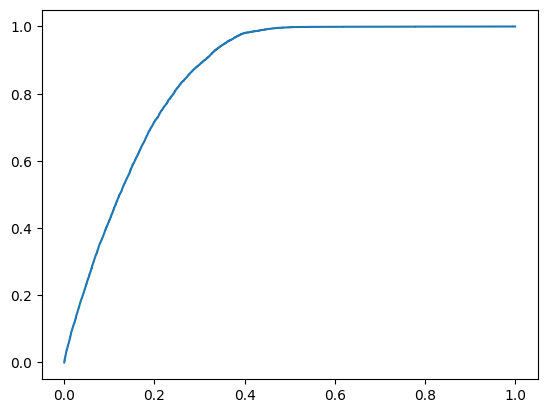

In [68]:
fpr,tpr,_ = roc_curve(y_test, y_score)

plt.plot(fpr, tpr)
plt.show()

In [69]:
print("AUC : ", auc(fpr, tpr))

AUC :  0.8547850457440587


In [72]:
roc_auc_score(y_test, y_score)

0.8547850457440587

In [82]:
# xgboost

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              use_label_encoder=False)


params = {
    'max_depth': np.arange(3,18).tolist(),
    'gamma': np.arange(1,9).tolist(),
    'min_child_weight': np.arange(0,10).tolist(),
    'n_estimators': [200,300]
}

scores = {
    'f1_score': make_scorer(f1_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

skf = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    scoring=scores,
    cv=skf.split(X_train, y_train),
    refit='accuracy_score'
)

In [ ]:
grid.fit(X=X_train, y=y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
y_score = grid.predict_proba(X_test)[:,1]

In [ ]:
fpr,tpr,_ = roc_curve(y_test, y_score)

plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(y_test, y_score)